## Exercices tests hypothèses statistiques (inférentielles)

In [2]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from common import *

In [3]:
data = pd.read_csv(get_dataset_dir("score-1.csv"), header=None)
data.columns = ["Score"]
data.head()

,Score
0,11
1,7
2,7
3,12
4,7


## 1. Test d'hypothèse sur la moyenne d'une population - Analyse univariée

Test 
- variable : score de rappel 
- Facteur d'étude : Norme (variable quantitative, un échantillon) = 7

--> Test de student pour données simples (seules) avec moyenne

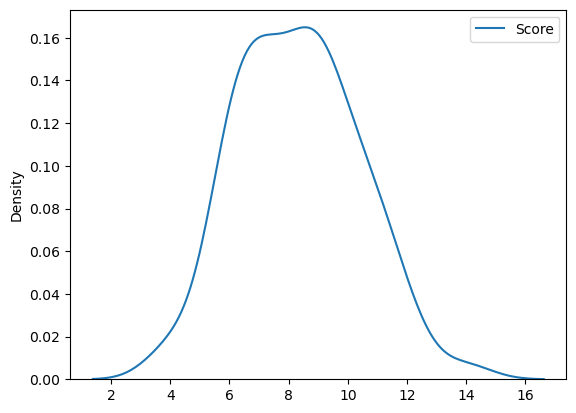

In [4]:
sns.kdeplot(data);

In [5]:
test_conclude(stats.normaltest(data['Score']), reverse=True)

NormaltestResult(statistic=0.806985310775368, pvalue=0.6679829328566486)
pvalue is showing valid study : True.


In [6]:
test_conclude(stats.ttest_1samp(data['Score'], popmean=7))

TtestResult(statistic=5.390853896414195, pvalue=9.229064699516705e-07, df=69)
pvalue is showing valid study : True.


## Score 2

- Facteur d'étude : norme testée de 310 points
- variable : Score national pour chaque équipe

--> Test de student pour données simples (seules) par rapport à une moyenne

In [7]:
data = pd.read_csv(get_dataset_dir("score-1.csv"), header=None)
data.columns = ["Score"]
data.head()

,Score
0,11
1,7
2,7
3,12
4,7


In [8]:
data.describe()


,Score
count,70.000000
mean,8.314286
std,2.039770
min,4.000000
25%,7.000000
50%,8.000000
75%,10.000000
max,14.000000


In [9]:
test_conclude(stats.normaltest(data['Score']), reverse=True)

NormaltestResult(statistic=0.806985310775368, pvalue=0.6679829328566486)
pvalue is showing valid study : True.


In [10]:
test_conclude(stats.ttest_1samp(data['Score'], popmean=310))

TtestResult(statistic=-1237.4353541790754, pvalue=1.0877176158452291e-151, df=69)
pvalue is showing valid study : True.


## Score 3

Test 
- variable : 2 groupes de score, continue, indépendants.
- Facteur d'étude : 2e groupe

--> distribution normale et homoscédasticité

--> Anova ou student (avec le paramètre de variance égale) sont adaptés. Chacun des 2 tests donne la même p-value

In [11]:
data = pd.read_csv(get_dataset_dir("score-3.csv"), sep=";")

data.head()

,GROUPE1,GROUPE2
0,442,581.0
1,470,520.0
2,478,670.0
3,416,497.0
4,505,600.0


In [12]:
g1 = data["GROUPE1"]
g2 = data["GROUPE2"]

g2.dropna(inplace=True)

g1.head()

0    442
1    470
2    478
3    416
4    505
Name: GROUPE1, dtype: int64

In [13]:
test_conclude(stats.normaltest(g1), reverse=True)
test_conclude(stats.normaltest(g2), reverse=True)
test_conclude(stats.levene(g1,g2), reverse=True) # Homoscedasticity test
# Variances are equal

NormaltestResult(statistic=1.106035439041655, pvalue=0.5752113620691502)
pvalue is showing valid study : True.
NormaltestResult(statistic=0.12096308196101899, pvalue=0.9413111445388013)
pvalue is showing valid study : True.
LeveneResult(statistic=2.753846715433797, pvalue=0.10042600156058794)
pvalue is showing valid study : True.


<Axes: xlabel='GROUPE1', ylabel='Density'>

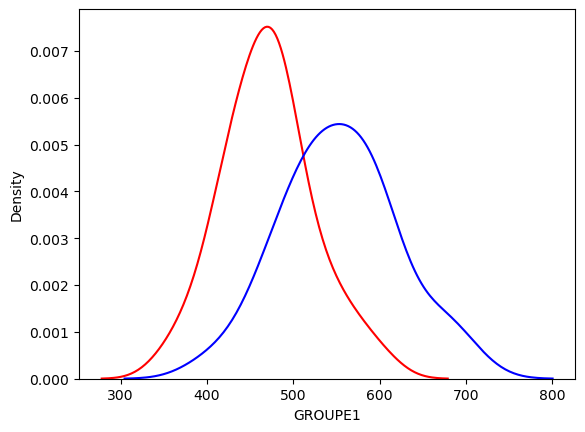

In [14]:
sns.kdeplot(g1, color="red")
sns.kdeplot(g2, color="blue")

{'whiskers': [<matplotlib.lines.Line2D at 0x13f80da20>,
 'caps': [<matplotlib.lines.Line2D at 0x13f80df60>,
 'boxes': [<matplotlib.lines.Line2D at 0x13f80d780>,
 'medians': [<matplotlib.lines.Line2D at 0x13f80e4a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x13f80e740>,
 'means': []}

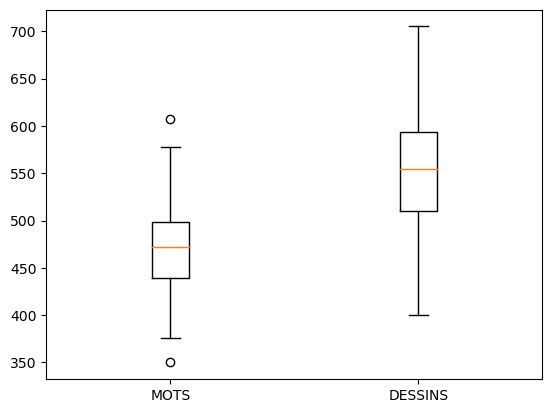

In [15]:
groupe = [g1, g2]
plt.boxplot(groupe, labels=["MOTS", "DESSINS"])

In [16]:
# g2 is unequal because of nan values so we use an independent t-test

test_conclude(stats.ttest_ind(g1, g2, equal_var=True))

Ttest_indResult(statistic=-6.722288824999849, pvalue=1.4742908481755571e-09)
pvalue is showing valid study : True.


In [17]:
test_conclude(stats.f_oneway(g1, g2))

F_onewayResult(statistic=45.18916704671782, pvalue=1.4742908481755667e-09)
pvalue is showing valid study : True.


## Score 4

Amélioration d'un score de concentration après une formation en méditation.

--> 2 groupe apparié avec chacun une variable quantitative continue

- Student pour données appariées est adapté
- Anova fonctionne aussi mais donne une p-value différente

In [18]:
data = pd.read_csv(get_dataset_dir("score-4.csv"), sep=";", index_col="SUJETS")

data.describe()

,AVANT,APRES
count,21.000000,21.000000
mean,11.190476,11.857143
std,3.187774,2.851065
min,6.000000,7.000000
25%,9.000000,10.000000
50%,11.000000,12.000000
75%,12.000000,13.000000
max,18.000000,17.000000


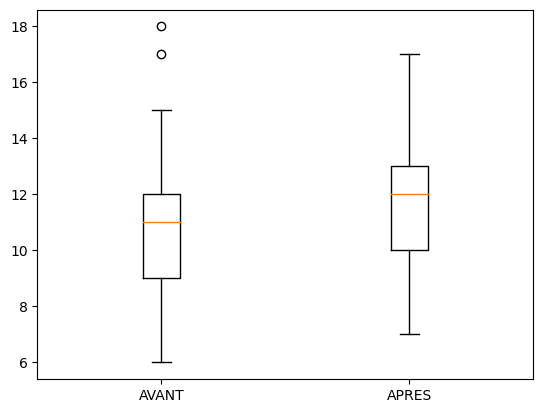

In [19]:
plt.boxplot(data, labels=['AVANT','APRES']);

In [20]:
for result in [
    stats.normaltest(data["AVANT"]),
    stats.normaltest(data["APRES"]),
    stats.levene(data["AVANT"], data["APRES"]),
]:
    test_conclude(result, reverse=True)

NormaltestResult(statistic=0.9915166816898752, pvalue=0.6091088200113967)
pvalue is showing valid study : True.
NormaltestResult(statistic=0.5444354056013817, pvalue=0.7616884213360244)
pvalue is showing valid study : True.
LeveneResult(statistic=0.007127583749109002, pvalue=0.9331396502303381)
pvalue is showing valid study : True.


In [21]:
stats.ttest_rel(data['AVANT'], data['APRES'])


TtestResult(statistic=-0.6645602896268298, pvalue=0.513921876314335, df=20)

In [22]:
stats.f_oneway(data['AVANT'], data['APRES'])

F_onewayResult(statistic=0.5102837802655559, pvalue=0.47916421534280584)

## Score 5

La familiarité des mots facilite-t-elle leur apprentissage ? F1 rares ==> F4 courant

- 4 groupes catégoriels indépendants présentant chacun une variable quantitative (score de rappel)
- ils sont paramétriques (distribution normale et homoscédasticité) donc analyse multivariée
Facteur étude : 
- + de 2 groupes qualitatifs ordinaux indépendants
- variable quantitative continue, paramétrique

In [23]:
data = pd.read_csv(get_dataset_dir("score-5.csv"), sep=";")

data.head()

,F1,F2,F3,F4
0,13.0,12.0,15.0,16
1,12.0,13.0,16.0,15
2,11.0,14.0,12.0,16
3,10.0,13.0,18.0,14
4,12.0,16.0,14.0,17


In [24]:
gs = [
    data["F1"].dropna(),
    data["F2"].dropna(),
    data["F3"].dropna(),
    data["F4"].dropna(),
]

for g in gs:
    print(g.describe())

count    18.000000
mean     12.055556
std       1.589385
min       8.000000
25%      11.250000
50%      12.000000
75%      13.000000
max      15.000000
Name: F1, dtype: float64
count    15.000000
mean     13.333333
std       1.914854
min      10.000000
25%      12.000000
50%      13.000000
75%      14.000000
max      17.000000
Name: F2, dtype: float64
count    18.000000
mean     15.000000
std       1.940285
min      12.000000
25%      14.000000
50%      15.000000
75%      16.000000
max      18.000000
Name: F3, dtype: float64
count    20.000000
mean     15.050000
std       2.235479
min      10.000000
25%      14.000000
50%      15.000000
75%      16.250000
max      18.000000
Name: F4, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x13f917a90>,
 'caps': [<matplotlib.lines.Line2D at 0x13f93d360>,
 'boxes': [<matplotlib.lines.Line2D at 0x13f93cca0>,
 'medians': [<matplotlib.lines.Line2D at 0x13f93d8a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x13f93db40>,
 'means': []}

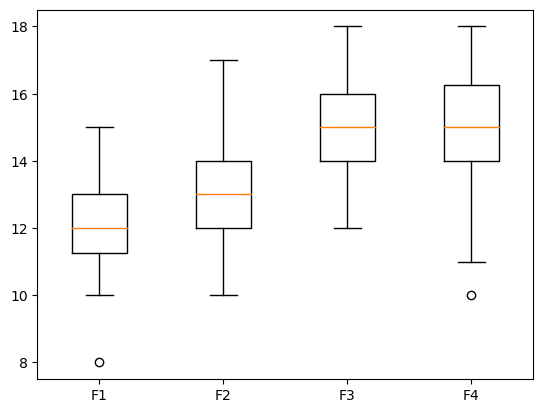

In [25]:
labels = ["F1", "F2", "F3", "F4"]

plt.boxplot(gs, labels=labels)


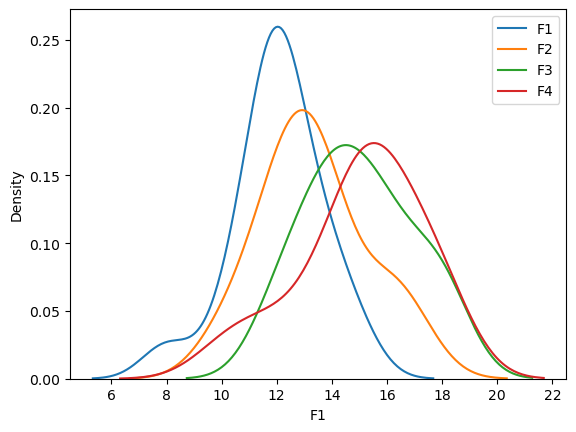

In [26]:
for g in gs:
    sns.kdeplot(g, legend=True)

plt.legend(labels=labels)

In [27]:
for g in gs:
    test_conclude(stats.normaltest(g), reverse=True)

NormaltestResult(statistic=3.4908338642436254, pvalue=0.17457218903836588)
pvalue is showing valid study : True.
NormaltestResult(statistic=0.4455610592110122, pvalue=0.8002904700872466)
pvalue is showing valid study : True.
NormaltestResult(statistic=1.0414133950006592, pvalue=0.5941005502082133)
pvalue is showing valid study : True.
NormaltestResult(statistic=2.283291396077277, pvalue=0.31929312912835456)
pvalue is showing valid study : True.


/Users/loic/mambaforge/envs/ml/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/loic/mambaforge/envs/ml/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [28]:
test_conclude(stats.f_oneway(*gs))

F_onewayResult(statistic=10.077576698057928, pvalue=1.4496140375015433e-05)
pvalue is showing valid study : True.


In [29]:
stats.ttest_ind(gs[0], gs[1])

Ttest_indResult(statistic=-2.095831779513942, pvalue=0.044356973616722487)

In [30]:
stats.ttest_ind(gs[1], gs[2])

Ttest_indResult(statistic=-2.4715937403720165, pvalue=0.019147383008004257)

In [31]:
stats.ttest_ind(gs[3], gs[2])

Ttest_indResult(statistic=0.07324035499758542, pvalue=0.9420202865234808)

## Score 6

Facteur d'étude : Nombre Suicide (quantitatif discontinue), 4 échantillons.
saison : variable qualitatives nominale

--> Si j'ai des chiffres (discret) dans des catégories je prend le chi^2

In [32]:
data = pd.read_csv(get_dataset_dir("score-6.csv"), sep=";")

data

,PRINTEMPS,SUMMER,AUTOMNE,HIVER
0,283,306,210,201


In [33]:
test_conclude(stats.chisquare(list(data.loc[0, :]), [250 for _ in range(4)]))


Power_divergenceResult(statistic=32.903999999999996, pvalue=3.3743909565465174e-07)
pvalue is showing valid study : True.


## Score 7

facteur d'étude : 2 normes HOMME, FEMME, variable qualitative continue
variable : deux échantillons de variables quantitatives (PG, PF)

--> analyse unvarié, chi^2 contingence pour 2 échantillons

In [34]:
data = pd.read_csv(get_dataset_dir("score-7.csv"), sep=";", index_col=0)

data

,HOMME,FEMME
PG,45,57
PF,55,43


In [35]:
stats.chi2_contingency(data)


Chi2ContingencyResult(statistic=2.420968387354942, pvalue=0.11972090062257504, dof=1, expected_freq=array([[51., 51.],
       [49., 49.]]))

## Altruisme et décibels
BRUITS FAIBLES      16 aident  et 3 non
BRUITS FORTS         4 aident et 17 non

In [36]:
tab = np.array([[16, 3], [4, 17]])
tab

array([[16,  3],
       [ 4, 17]])

In [37]:
stats.chi2_contingency(tab)


Chi2ContingencyResult(statistic=14.436090225563909, pvalue=0.0001449967827002435, dof=1, expected_freq=array([[ 9.5,  9.5],
       [10.5, 10.5]]))

## Score 9

- variables de réponses : quantitative continue, apparié
- Facteur d'étude : quantitative continue, apparié

In [38]:
data = pd.read_csv(get_dataset_dir("score-9.csv"), sep=";", index_col='ELEVE')

data.head()

,NOTE SEMANTIQUE,MOYENNE GENERALE
ELEVE,,
1,603,18.05
2,264,4.58
3,537,13.33
4,347,9.67
5,463,12.24


In [39]:
data.describe()

,NOTE SEMANTIQUE,MOYENNE GENERALE
count,20.00000,20.000000
mean,430.30000,11.378500
std,130.23788,3.460455
min,39.00000,4.580000
25%,354.50000,9.560000
50%,458.50000,10.820000
75%,515.50000,13.525000
max,603.00000,18.050000


In [40]:
test_conclude(stats.normaltest(data['NOTE SEMANTIQUE']), reverse=True)
test_conclude(stats.normaltest(data['MOYENNE GENERALE']), reverse=True)

test_conclude(stats.levene(data['NOTE SEMANTIQUE'], data['MOYENNE GENERALE']), reverse=True)

# une seule distribution normale, pas de variance égale donc on utilise un test non paramétrique

NormaltestResult(statistic=11.8335396057896, pvalue=0.002693887926810395)
pvalue is showing valid study : False.
NormaltestResult(statistic=0.04300711823255439, pvalue=0.9787259940633323)
pvalue is showing valid study : True.
LeveneResult(statistic=18.48308429319689, pvalue=0.0001151091123330023)
pvalue is showing valid study : False.


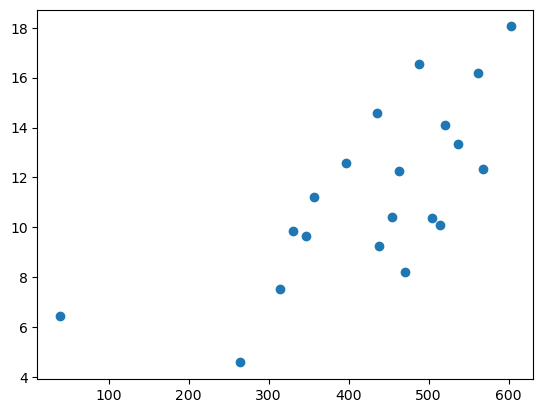

In [41]:
plt.scatter(data["NOTE SEMANTIQUE"], data["MOYENNE GENERALE"])

In [42]:
test_conclude(stats.spearmanr(data['NOTE SEMANTIQUE'], data['MOYENNE GENERALE']))

SignificanceResult(statistic=0.7007518796992479, pvalue=0.0005786641020194392)
pvalue is showing valid study : True.


## Score 10

- variables : 1gp variable quantitative continue, indépendante
- facteur d'étude : 1gp variable quantitative continue, indépendante

In [43]:
float_comma_converter = lambda x: float(x.replace(",", "."))

data = pd.read_csv(
    get_dataset_dir("score-10.csv"),
    sep=";",
    index_col="ANNEE",
    converters={
        "TAUXCHOMAGE": float_comma_converter,
        "TAUXSUICIDE": float_comma_converter,
    },
)

print(data.head())

data.tail()

       TAUXCHOMAGE  TAUXSUICIDE
ANNEE                          
1981          4.91         32.1
1982          4.93         35.1
1983          4.95         36.0
1984          5.82         37.4
1985          6.21         37.2


,TAUXCHOMAGE,TAUXSUICIDE
ANNEE,,
1991,6.82,35.8
1992,6.91,36.4
1993,8.01,38.2
1994,9.04,39.1
1995,8.43,38.3


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 1981 to 1995
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TAUXCHOMAGE  15 non-null     float64
 1   TAUXSUICIDE  15 non-null     float64
dtypes: float64(2)
memory usage: 360.0 bytes


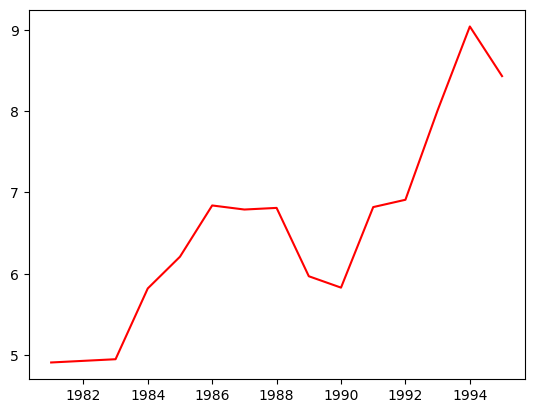

In [45]:
plt.plot(data.index, data['TAUXCHOMAGE'], color="red")


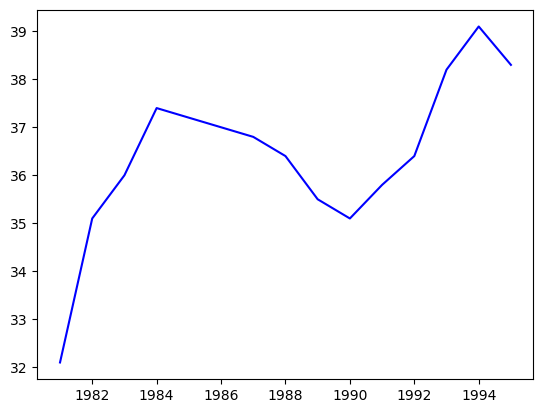

In [46]:
plt.plot(data.index, data['TAUXSUICIDE'], color="b")

In [47]:
# Test parametric

data['TAUXCHOMAGE'].dropna(inplace=True)
data['TAUXSUICIDE'].dropna(inplace=True)

test_conclude(stats.shapiro(data['TAUXCHOMAGE']), reverse=True)
test_conclude(stats.shapiro(data['TAUXSUICIDE']), reverse=True)

ShapiroResult(statistic=0.9307516813278198, pvalue=0.280019611120224)
pvalue is showing valid study : True.
ShapiroResult(statistic=0.9384810328483582, pvalue=0.3636546730995178)
pvalue is showing valid study : True.


In [48]:
test_conclude(stats.levene(data['TAUXCHOMAGE'], data['TAUXSUICIDE']), reverse=True)

LeveneResult(statistic=0.49068638339732756, pvalue=0.4894016337632644)
pvalue is showing valid study : True.


In [49]:
data.corr()

,TAUXCHOMAGE,TAUXSUICIDE
TAUXCHOMAGE,1.000000,0.796243
TAUXSUICIDE,0.796243,1.000000


In [50]:
stats.pearsonr(data['TAUXCHOMAGE'], data['TAUXSUICIDE'])

PearsonRResult(statistic=0.7962428796338278, pvalue=0.00038254509742530744)

## Score 12

Influence de la musique sur le temps d'attente au téléphone

Test, analyse multivariée :

- Variable : + de 2 groupes var quantitative. Distribution normale et variance égales donc paramétrique.
- Facteur d'étude : liste de moyennes quantitatives indépendantes

> Une comparaison entre moyenne implique un test de différence donc partie droite du schéma de choix de test statistique.
> Sinon on aurait choisit une correlation pearson...

In [51]:
data = pd.read_csv(get_dataset_dir("score-12.csv"), sep=";")

data.head()

,CLASSIQUE,POPULAIRE,RELAXANTE,COUNTRY,JAZZ
0,26.74,19.64,29.72,23.39,7.94
1,10.87,16.52,23.59,15.41,7.28
2,26.51,17.10,31.09,11.00,12.48
3,18.67,18.11,22.14,3.72,9.64
4,15.03,29.20,24.36,7.96,9.31


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CLASSIQUE  14 non-null     float64
 1   POPULAIRE  14 non-null     float64
 2   RELAXANTE  14 non-null     float64
 3   COUNTRY    14 non-null     float64
 4   JAZZ       14 non-null     float64
dtypes: float64(5)
memory usage: 688.0 bytes


In [53]:
data['CLASSIQUE'].describe()

count    14.000000
mean     13.200714
std       8.183911
min       2.870000
25%       6.287500
50%      10.895000
75%      19.952500
max      26.740000
Name: CLASSIQUE, dtype: float64

In [54]:
data['JAZZ'].describe()

count    14.0000
mean      9.2350
std       2.9612
min       5.2100
25%       7.3950
50%       8.9150
75%      11.7550
max      14.2700
Name: JAZZ, dtype: float64

In [55]:
gs = [data[col] for col in data.columns]
for x in gs:
    test_conclude(stats.shapiro(x), reverse=True)

test_conclude(stats.levene(*gs), reverse=True)

ShapiroResult(statistic=0.9220395684242249, pvalue=0.23523768782615662)
pvalue is showing valid study : True.
ShapiroResult(statistic=0.9456349611282349, pvalue=0.49520450830459595)
pvalue is showing valid study : True.
ShapiroResult(statistic=0.9581481218338013, pvalue=0.6925058364868164)
pvalue is showing valid study : True.
ShapiroResult(statistic=0.890737771987915, pvalue=0.08283612132072449)
pvalue is showing valid study : True.
ShapiroResult(statistic=0.9326695799827576, pvalue=0.33246690034866333)
pvalue is showing valid study : True.
LeveneResult(statistic=3.8774475697551227, pvalue=0.006927798459531864)
pvalue is showing valid study : False.


In [56]:
# Or en excluant le jazz on obtiendra un potentiel test paramétrique car les variances sont égales
jazz_excluded = gs[0 : len(gs) - 1]

test_conclude(stats.levene(*gs), reverse=True)
test_conclude(
    stats.levene(*jazz_excluded),
    reverse=True,
)

LeveneResult(statistic=3.8774475697551227, pvalue=0.006927798459531864)
pvalue is showing valid study : False.
LeveneResult(statistic=1.8364902118673294, pvalue=0.1519978248561851)
pvalue is showing valid study : True.


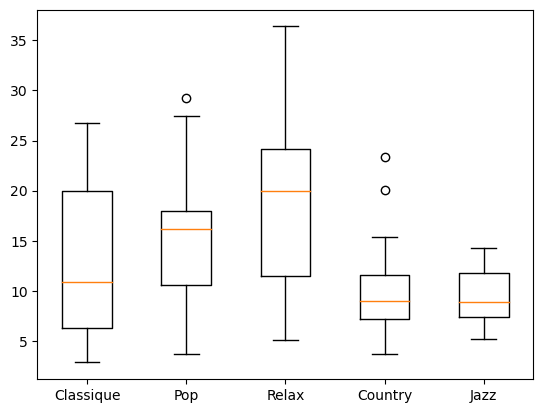

In [57]:
plt.boxplot(data, labels=['Classique','Pop','Relax','Country','Jazz']);

In [58]:
# Peut aussi être pertinent si on inclus le groupe jazz non paramètrique dans l'étude

test_conclude(stats.kruskal(*gs))

KruskalResult(statistic=10.983845932739285, pvalue=0.026746164938058637)
pvalue is showing valid study : True.


In [59]:
test_conclude(stats.f_oneway(*jazz_excluded))

F_onewayResult(statistic=2.844134007487986, pvalue=0.046530648566629744)
pvalue is showing valid study : True.


In [60]:
stats.ttest_ind(data["COUNTRY"], data["JAZZ"])

Ttest_indResult(statistic=0.6546484341371426, pvalue=0.5184440108177668)

In [61]:
stats.ttest_ind(data["COUNTRY"], data["RELAXANTE"])

Ttest_indResult(statistic=-2.828965382487478, pvalue=0.008877410908334191)

## Score 14

Test, analyse multivariée :

- Facteur d'étude : + de 2 groupes catégoriels nominaux <=> comparaison score (cf mean schéma) par catégorie.
- variable de réponse : variables quantitatives continues. Distribution normale et variances égales donc non paramétrique.

--> On partira sur un kruskal wallis suivi d'un post hoc de Tukey

In [105]:
data = pd.read_csv(get_dataset_dir("score-14.csv"), sep=";")

print(data.info())

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MUSIQUE  70 non-null     object 
 1   SCORE    70 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB
None


,MUSIQUE,SCORE
0,CLASSIQUE,26.74
1,CLASSIQUE,10.87
2,CLASSIQUE,26.51
3,CLASSIQUE,18.67
4,CLASSIQUE,15.03


In [106]:
# transpose dataframe
df = data.groupby('MUSIQUE').apply(lambda x: x['SCORE'].tolist()).to_frame()

new_df = df.T

exploded_df = new_df.apply(pd.Series).explode(list(new_df.columns)).reset_index(drop=True)

exploded_df = exploded_df.apply(lambda x: [float(i) for i in x])

exploded_df


MUSIQUE,CLASSIQUE,COUNTRY,JAZZ,POPULAIRE,RELAXANTE
0,26.74,23.39,7.94,19.64,29.72
1,10.87,15.41,7.28,16.52,23.59
2,26.51,11.00,12.48,17.10,31.09
3,18.67,3.72,9.64,18.11,22.14
4,15.03,7.96,9.31,29.20,24.36
5,20.38,20.04,12.46,17.39,36.37
6,20.43,11.81,8.93,10.12,22.88
7,5.63,10.05,5.21,27.40,17.72
8,5.37,7.41,14.27,15.87,10.98
9,2.87,9.33,8.90,13.23,6.03


In [107]:
exploded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CLASSIQUE  14 non-null     float64
 1   COUNTRY    14 non-null     float64
 2   JAZZ       14 non-null     float64
 3   POPULAIRE  14 non-null     float64
 4   RELAXANTE  14 non-null     float64
dtypes: float64(5)
memory usage: 688.0 bytes


In [108]:
gs = [exploded_df[col] for col in exploded_df.columns]
for x in gs:
    test_conclude(stats.shapiro(x), reverse=True)

test_conclude(stats.levene(*gs), reverse=True)

ShapiroResult(statistic=0.9220395684242249, pvalue=0.23523768782615662)
pvalue is showing valid study : True.
ShapiroResult(statistic=0.890737771987915, pvalue=0.08283612132072449)
pvalue is showing valid study : True.
ShapiroResult(statistic=0.9326695799827576, pvalue=0.33246690034866333)
pvalue is showing valid study : True.
ShapiroResult(statistic=0.9456349611282349, pvalue=0.49520450830459595)
pvalue is showing valid study : True.
ShapiroResult(statistic=0.9581481218338013, pvalue=0.6925058364868164)
pvalue is showing valid study : True.
LeveneResult(statistic=3.877447569755122, pvalue=0.006927798459531864)
pvalue is showing valid study : False.


In [114]:
test_conclude(stats.kruskal(*gs))

KruskalResult(statistic=10.983845932739285, pvalue=0.026746164938058637)
pvalue is showing valid study : True.


In [115]:
# KruskalResult is significant so we do a post hoc test
result = stats.tukey_hsd(*gs)

print(result)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      2.833     0.839    -4.860    10.526
 (0 - 2)      3.966     0.600    -3.727    11.659
 (0 - 3)     -1.818     0.964    -9.511     5.875
 (0 - 4)     -5.746     0.234   -13.440     1.947
 (1 - 0)     -2.833     0.839   -10.526     4.860
 (1 - 2)      1.133     0.994    -6.560     8.826
 (1 - 3)     -4.651     0.443   -12.344     3.042
 (1 - 4)     -8.579     0.021   -16.272    -0.886
 (2 - 0)     -3.966     0.600   -11.659     3.727
 (2 - 1)     -1.133     0.994    -8.826     6.560
 (2 - 3)     -5.784     0.229   -13.477     1.910
 (2 - 4)     -9.712     0.006   -17.405    -2.019
 (3 - 0)      1.818     0.964    -5.875     9.511
 (3 - 1)      4.651     0.443    -3.042    12.344
 (3 - 2)      5.784     0.229    -1.910    13.477
 (3 - 4)     -3.929     0.609   -11.622     3.765
 (4 - 0)      5.746     0.234    -1.947    13.440
 (4 - 1)      8.579     0.021   

<Axes: xlabel='MUSIQUE', ylabel='MUSIQUE'>

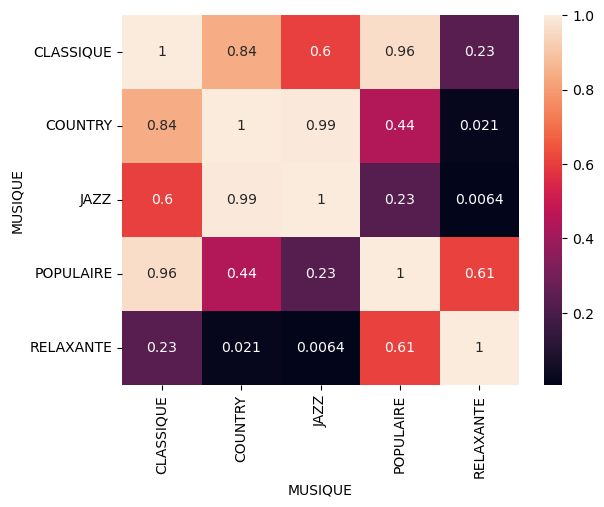

In [116]:

labeled = pd.DataFrame(result.pvalue, columns=exploded_df.columns)

labeled.index = exploded_df.columns

sns.heatmap(labeled, annot=True)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
CLASSIQUE   COUNTRY  -2.8329 0.8391  -10.526  4.8603  False
CLASSIQUE      JAZZ  -3.9657 0.6004 -11.6589  3.7275  False
CLASSIQUE POPULAIRE   1.8179 0.9635  -5.8753   9.511  False
CLASSIQUE RELAXANTE   5.7464 0.2344  -1.9468 13.4396  False
  COUNTRY      JAZZ  -1.1329 0.9937   -8.826  6.5603  False
  COUNTRY POPULAIRE   4.6507 0.4434  -3.0425 12.3439  False
  COUNTRY RELAXANTE   8.5793 0.0213   0.8861 16.2725   True
     JAZZ POPULAIRE   5.7836 0.2286  -1.9096 13.4768  False
     JAZZ RELAXANTE   9.7121 0.0064    2.019 17.4053   True
POPULAIRE RELAXANTE   3.9286 0.6091  -3.7646 11.6218  False
-----------------------------------------------------------


group1,group2,meandiff,p-adj,lower,upper,reject
CLASSIQUE,COUNTRY,-2.8329,0.8391,-10.526,4.8603,False
CLASSIQUE,JAZZ,-3.9657,0.6004,-11.6589,3.7275,False
CLASSIQUE,POPULAIRE,1.8179,0.9635,-5.8753,9.511,False
CLASSIQUE,RELAXANTE,5.7464,0.2344,-1.9468,13.4396,False
COUNTRY,JAZZ,-1.1329,0.9937,-8.826,6.5603,False
COUNTRY,POPULAIRE,4.6507,0.4434,-3.0425,12.3439,False
COUNTRY,RELAXANTE,8.5793,0.0213,0.8861,16.2725,True
JAZZ,POPULAIRE,5.7836,0.2286,-1.9096,13.4768,False
JAZZ,RELAXANTE,9.7121,0.0064,2.019,17.4053,True
POPULAIRE,RELAXANTE,3.9286,0.6091,-3.7646,11.6218,False


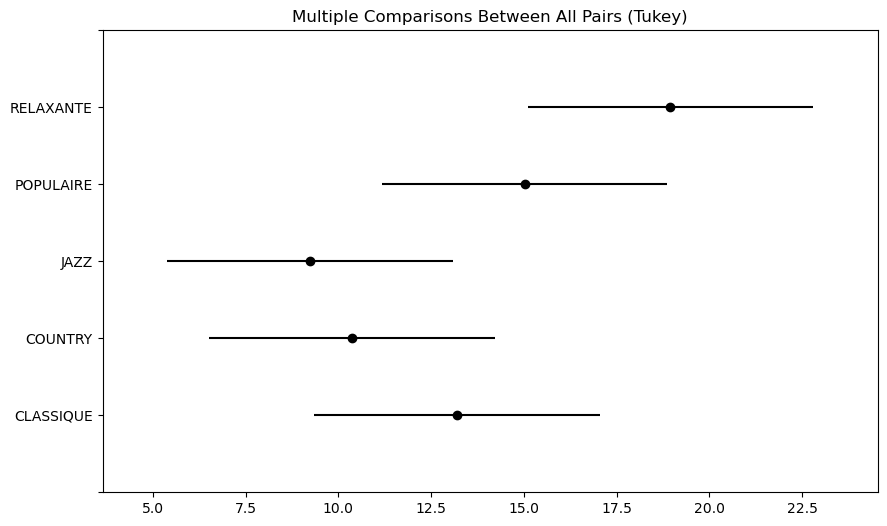

In [117]:
from statsmodels.stats.multicomp import MultiComparison, pairwise_tukeyhsd

mc = MultiComparison(data["SCORE"], data["MUSIQUE"])
resultat = mc.tukeyhsd()

print(resultat)

mc2 = pairwise_tukeyhsd(endog=data["SCORE"], groups=data["MUSIQUE"])
mc2.plot_simultaneous()
mc2.summary()

## Data 2

Test :

- Variables : + de 2 groupes catégoriels nominaux indépendants.
- Données qualitative ordinale

In [118]:
chips = pd.read_csv(get_dataset_dir("data2.csv"), sep=";")

print(chips.info())
chips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Preference    100 non-null    int64
 1   Sale          100 non-null    int64
 2   Sucre         100 non-null    int64
 3   Acidite       100 non-null    int64
 4   Croustillant  100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB
None


,Preference,Sale,Sucre,Acidite,Croustillant
0,1,3,3,3,3
1,1,1,2,3,1
2,1,2,2,5,1
3,1,1,4,3,1
4,2,3,3,2,2


In [119]:
chips.corr()

,Preference,Sale,Sucre,Acidite,Croustillant
Preference,1.000000,0.280465,0.031249,-0.063211,0.438298
Sale,0.280465,1.000000,-0.124927,-0.100368,0.065241
Sucre,0.031249,-0.124927,1.000000,-0.237212,-0.068730
Acidite,-0.063211,-0.100368,-0.237212,1.000000,0.132331
Croustillant,0.438298,0.065241,-0.068730,0.132331,1.000000
